In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%config InlineBackend.figure_format = 'retina'

plt.rc('font', size=14)

### Load DataV

In [2]:
dir_datav = '/home/hhg/Research/emu_Nx2pt/data/train_300/'
datav0 = np.loadtxt(dir_datav+'10x2pt_emu_0')[:,1]
mask0 = np.loadtxt(dir_datav+'10x2pt_emu_0'+'_mask.txt')[:,1]

In [3]:
mask0

array([1., 1., 1., ..., 1., 1., 1.])

### Load Cov

In [4]:
import pickle

data_dir = '/home/hhg/Research/emu_Nx2pt/data/'
filename = data_dir+'cov3500.pkl'

with open(filename, 'rb') as handle:
    cov_full = pickle.load(handle)

## Experiment: Just take 1 correlation bin

In [5]:
mask0[0:25]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0.])

In [6]:
mask0[0:22]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [7]:
dv = datav0[0:22]
cov = cov_full[0:22, 0:22]

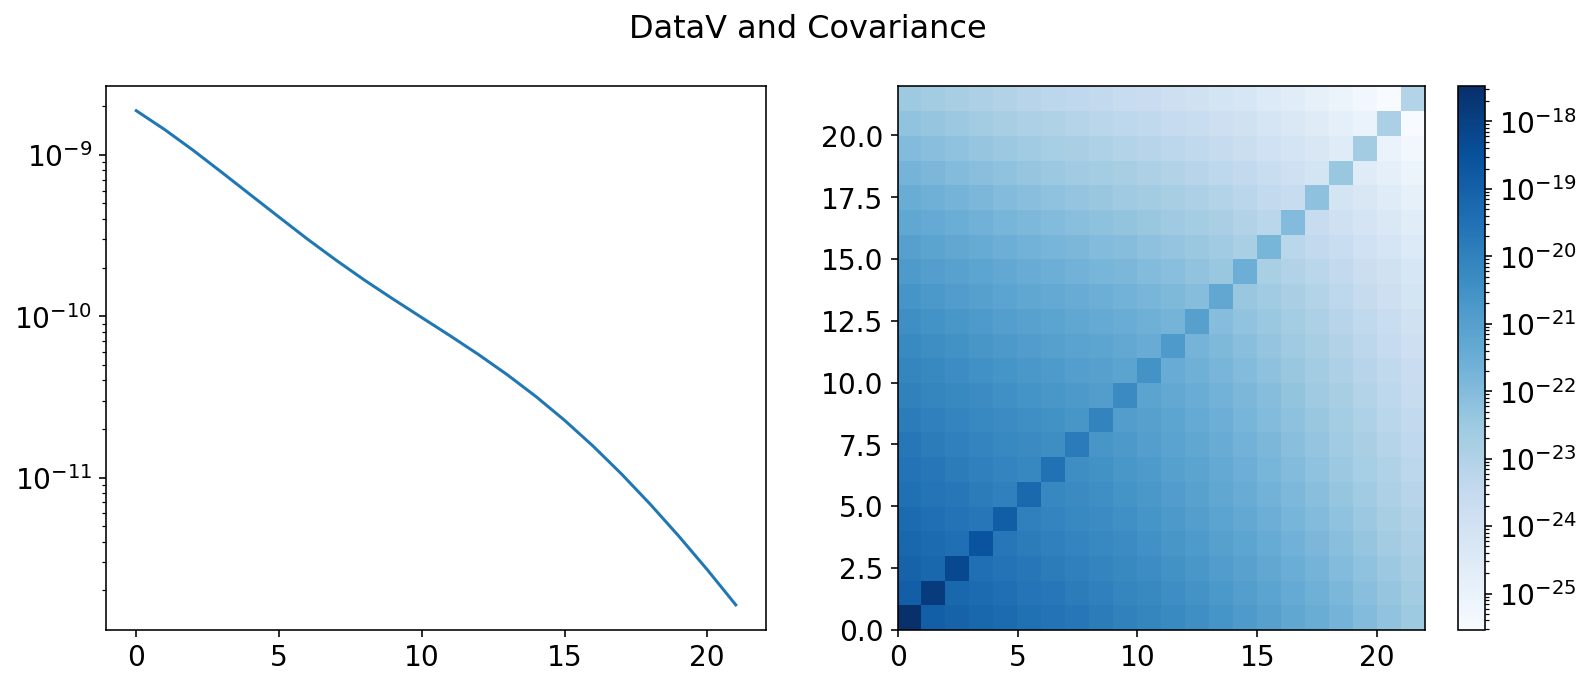

In [8]:
fig = plt.figure(figsize=(13,5))
fig.suptitle(f'DataV and Covariance', fontsize=16)

# ----------
plt.subplot(1, 2, 1)
plt.plot(range(0,22), dv)
plt.yscale('log')

# ----------

plt.subplot(1, 2, 2)
plt.pcolor(cov, norm=LogNorm(), cmap='Blues')
plt.colorbar()

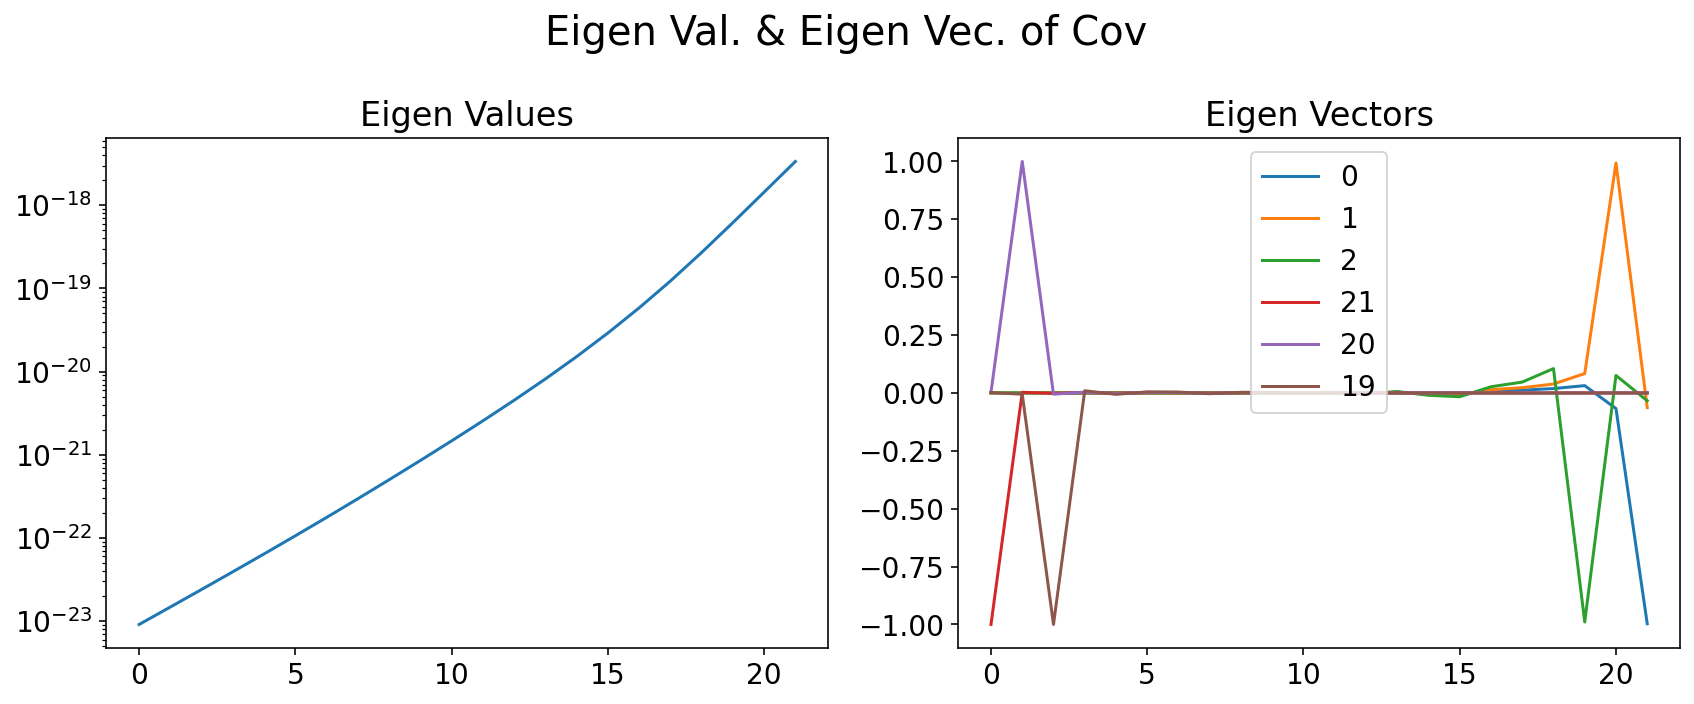

In [9]:
eigensys = np.linalg.eigh(cov)
evals = eigensys[0]
evecs = eigensys[1]

# ----------

fig = plt.figure(figsize=(12,5))
fig.suptitle(f'Eigen Val. & Eigen Vec. of Cov', fontsize=20)

plt.subplot(1, 2, 1)
plt.plot(range(0,22), evals)
plt.yscale('log')
plt.title('Eigen Values')

# ----------

plt.subplot(1, 2, 2)

for i in [0,1,2,21,20,19]:
    plt.plot(range(0,22), evecs[i], label=f'{i}')
#plt.yscale('log')
plt.legend(loc='upper center')
plt.title('Eigen Vectors')

# ----------

plt.tight_layout()

## Cholesky Decomposition

<img src="./plots/PCA.png" alt="" width="400">

In [10]:
L = np.linalg.cholesky(cov)
invL = np.linalg.inv(L)

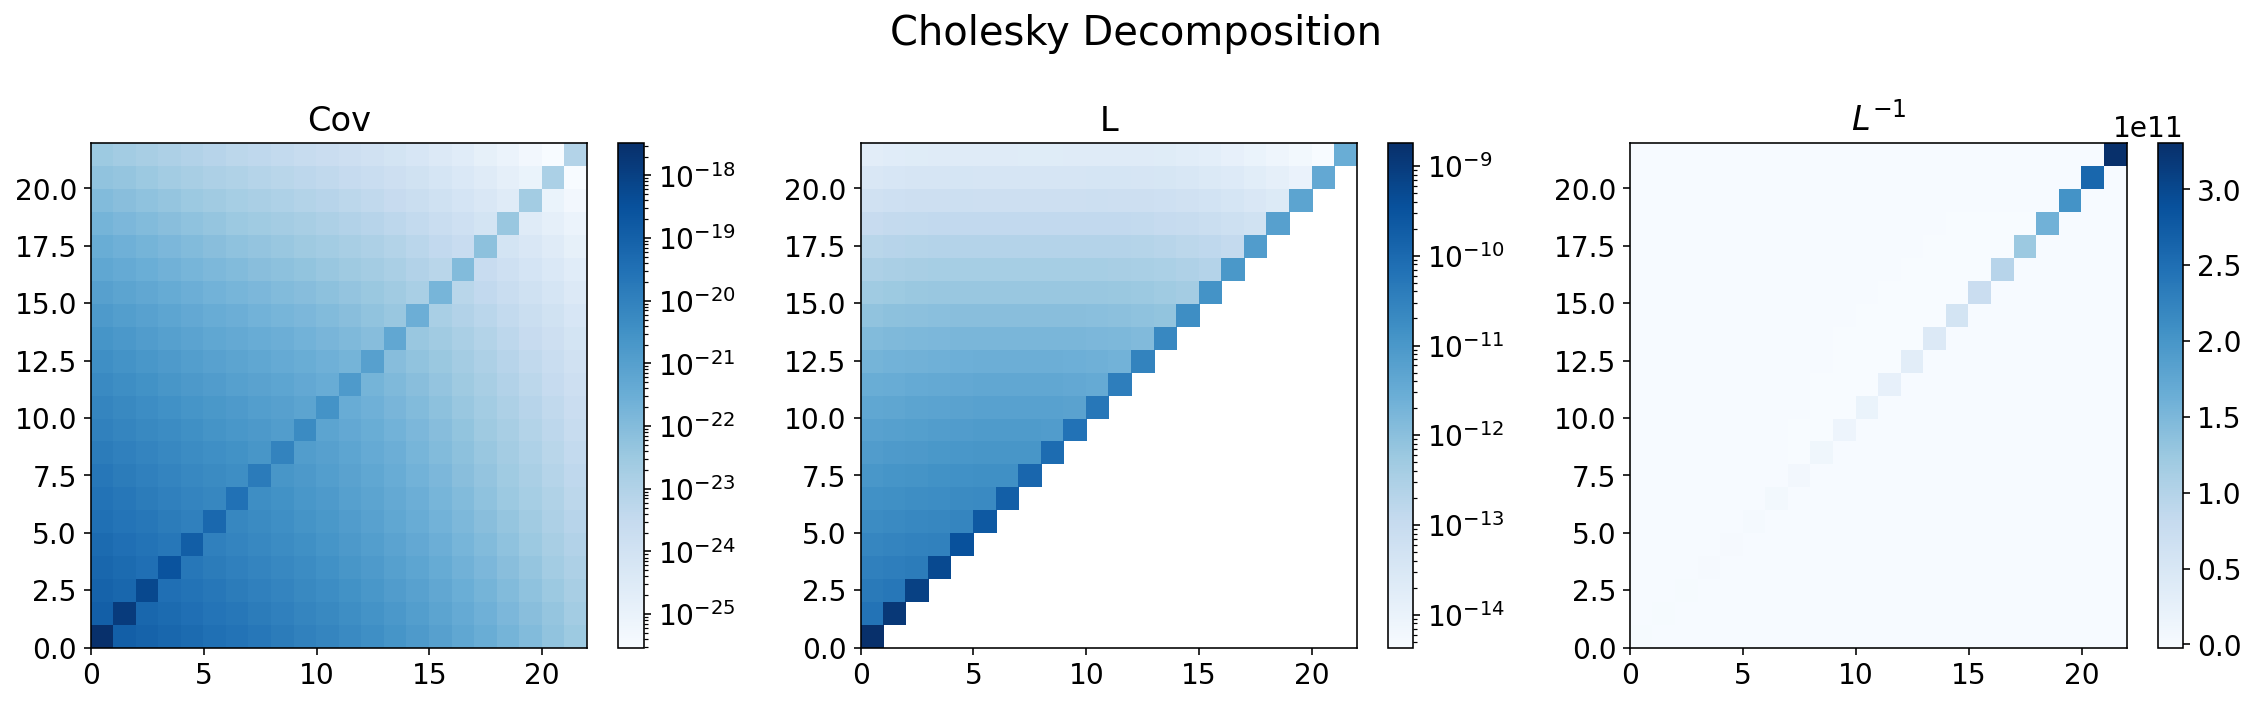

In [11]:
fig = plt.figure(figsize=(16,5))
fig.suptitle(f'Cholesky Decomposition', fontsize=20)

plt.subplot(1, 3, 1)
plt.pcolor(cov, norm=LogNorm(), cmap='Blues')
plt.colorbar()
plt.title('Cov')

plt.subplot(1, 3, 2)
plt.pcolor(L, norm=LogNorm(), cmap='Blues')
plt.colorbar()
plt.title('L')

# plt.subplot(1, 3, 2)
# plt.pcolor(L.T, norm=LogNorm(), cmap='Blues')
# plt.colorbar()
# plt.title('$L^t$')

plt.subplot(1, 3, 3)
plt.pcolor(invL, cmap='Blues')
plt.colorbar()
plt.title('$L^{-1}$')

plt.tight_layout()


## Transformed Data Vector

dv_ch = invL@dv

In [12]:
dv_ch = invL@dv

Text(0.5, 1.0, 'dv_ch = invL@dv')

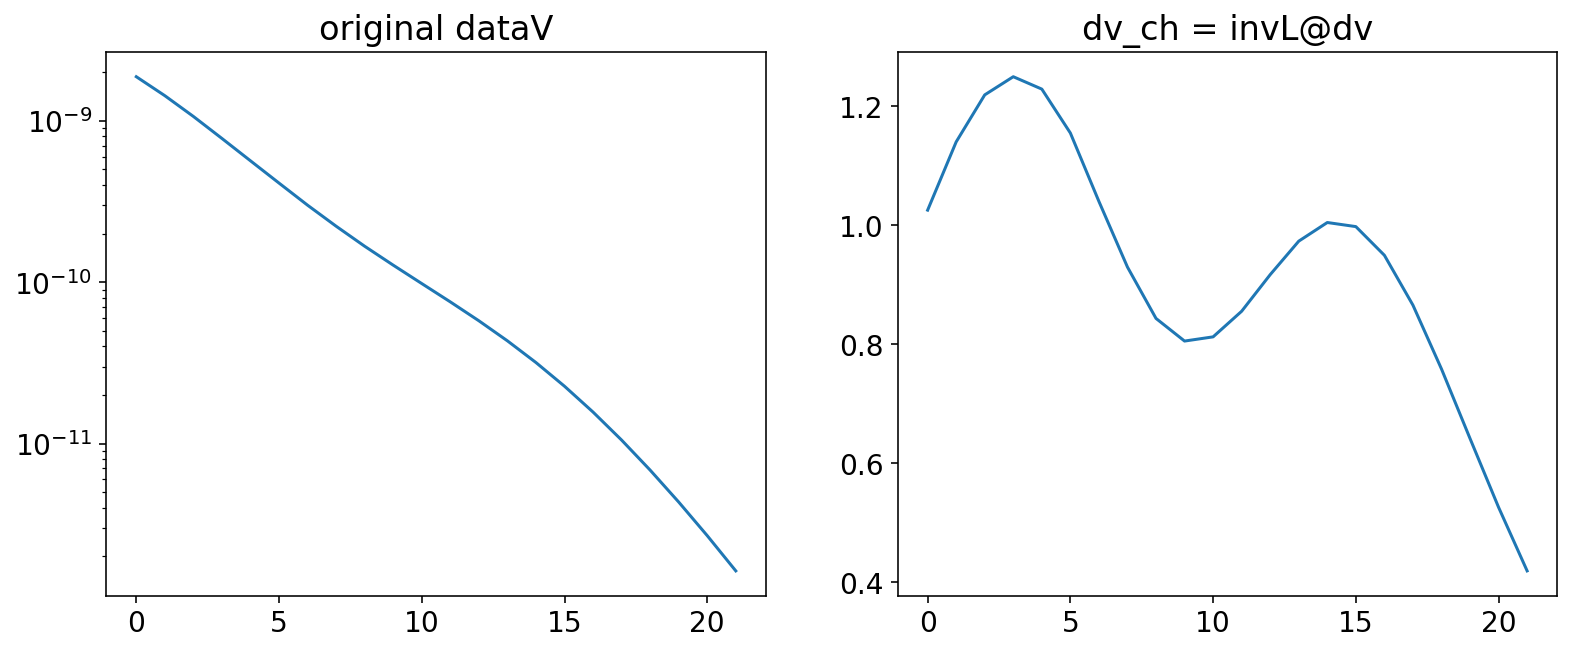

In [13]:
fig = plt.figure(figsize=(13,5))
#fig.suptitle(f'DataV and Covariance', fontsize=16)

# ----------
plt.subplot(1, 2, 1)
plt.plot(range(0,22), dv)
plt.yscale('log')
plt.title('original dataV')
# ----------

plt.subplot(1, 2, 2)
plt.plot(range(0,22), dv_ch)
plt.title('dv_ch = invL@dv')